#### **files to explore:**
- `financial_data_cleaned.csv`
- `wsbstocks.csv`
- `motilaloswalmfi.csv`
- `startup data.csv`

### **1. First-Pass Exploratory Data Analysis (EDA)**  

#### **Introduction**  
Financial markets are **highly interconnected**, and shocks often arise from **systemic vulnerabilities** rather than isolated events. Understanding **leading indicators of financial stress** provides insight into **predicting downturns, bull runs, and volatility spikes**. In this exploratory phase, we analyze **four datasets** to identify **key financial variables** that contribute to **market instability**. Before diving into anomalies, we first assess **data integrity**—incomplete or inconsistent data can distort insights and lead to flawed predictions. A systematic review of data gaps allows us to:  
- Identify **biases and missing data patterns** affecting our analysis.  
- Determine whether **data imputation or alternative preprocessing** is needed.  
- Ensure a **solid foundation** for financial forecasting and risk modeling.  

#### **Key Takeaways and Goals**  
- **Ensure data completeness** to avoid misleading conclusions.  
- **Establish a reliable dataset** to support predictive modeling.  
- **Lay the groundwork** for understanding financial stress indicators.

---

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
file_paths = {
    "financial_data": "../data/processed/financial_data_cleaned.csv",
    "motilal_oswal": "../data/external/motilaloswalmfi.csv",
    "wsb_stocks": "../data/external/wsbstocks.csv",
    "startup_data": "../data/external/startup data.csv"
}

dfs = {name: pd.read_csv(path) for name, path in file_paths.items()}

### **2. Cleaning Data and Establishing a Baseline: Correlation and Time-Series Visualization**

At the start of our analysis, we often encounter datasets that are messy and unstructured, making them difficult to work with. Our first goal is to establish a simple yet effective foundation for exploration. To do this, we will generate a basic correlation matrix and time-series visualizations for each of the four datasets in our dictionary. This will provide an initial understanding of the relationships between variables and highlight key trends over time. We want:
- A simple correlation matrix to uncover relationships between key variables.
- Time-series visualizations to observe trends and patterns over time.
- Establish a clean and structured dataset for future analysis.

---
#### **1st Dataset: `dfs["financial_data"]`**

In [549]:
# uncomment to view
# print(dfs["financial_data"].head())
# print(dfs["financial_data"].columns)

In [551]:
financial_data = dfs["financial_data"].copy()

In [553]:
# Check for missing values in each column
missing_values = financial_data.isnull().sum()

# Check percentage of missing values
missing_percentage = (missing_values / len(financial_data)) * 100

# Create a dataframe summarizing missing data
missing_data_summary = pd.DataFrame({
    'Missing Values': missing_values,
    'Missing Percentage': missing_percentage
}).sort_values(by='Missing Percentage', ascending=False)

# Display the first few rows of the missing data summary
print(missing_data_summary.head(20))  # Show top 20 columns with most missing data

                                                    Missing Values  \
Adj Close_BTC-USD                                             3889   
interest rates                                                1058   
stock market crash                                            1058   
inflation                                                     1058   
recession                                                     1058   
buy gold                                                      1058   
market crash                                                  1058   
Bond Yields_lag30_lag90_lag180_rolling90_rollin...             569   
Unemployment_lag30_lag90_lag180_rolling90_rolli...             568   
Inflation_lag30_lag90_lag180_rolling90_rolling180              568   
Interest Rate_lag30_lag90_lag180_rolling90_roll...             568   
Consumer Sentiment_lag30_lag90_lag180_rolling90...             568   
GDP_lag30_lag90_lag180_rolling90_rolling180                    568   
Bond Yields_lag90_la

**Observation:** We note that BTC was established after we begin collecting data. Therefore, we try to split into two (before- and after-BTC measurement collection start).

In [555]:
# Convert Date column to datetime and set as index
# run once
financial_data.rename(columns={'Unnamed: 0': 'Date'}, inplace=True)
financial_data['Date'] = pd.to_datetime(financial_data['Date'], errors='coerce')

In [478]:
# also comment this out after one run-through if Date is contained in the index
# financial_data.reset_index(inplace=True)

In [557]:
financial_data.head()

,Date,Adj Close_BTC-USD,Adj Close_^GSPC,Adj Close_^IXIC,Adj Close_^VIX,Bond Yields,Inflation,Unemployment,Interest Rate,Consumer Sentiment,...,Interest Rate_lag30_lag90_lag180_rolling90_rolling180,Consumer Sentiment_lag30_lag90_lag180_rolling90_rolling180,GDP_lag30_lag90_lag180_rolling90_rolling180,Rolling_Std_30d,market crash,buy gold,recession,inflation,stock market crash,interest rates
0,2000-01-01,NaN,NaN,NaN,NaN,NaN,169.3,4.0,5.45,112.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2000-01-03,NaN,1455.219971,4131.149902,24.209999,6.58,169.3,4.0,5.45,112.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2000-01-04,NaN,1399.420044,3901.689941,27.010000,6.49,169.3,4.0,5.45,112.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2000-01-05,NaN,1402.109985,3877.540039,26.410000,6.62,169.3,4.0,5.45,112.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2000-01-06,NaN,1403.449951,3727.129883,25.730000,6.57,169.3,4.0,5.45,112.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [559]:
before_btc = financial_data[financial_data["Adj Close_BTC-USD"].isna() == True]
df_without_btc = before_btc.copy()

In [561]:
after_btc = financial_data[financial_data["Adj Close_BTC-USD"].isna() == False]
df_with_btc = after_btc.copy()

In [563]:
# Check for missing values in each column for the dataset after BTC start date
missing_values_after_btc = df_with_btc.isnull().sum()

# Check percentage of missing values
missing_percentage_after_btc = (missing_values_after_btc / len(df_with_btc)) * 100

In [567]:
# after_btc

In [569]:
# Check for missing values in each column for the dataset before BTC start date
missing_values_before_btc = df_without_btc.isnull().sum()

# Check percentage of missing values
missing_percentage_before_btc = (missing_values_before_btc / len(df_without_btc)) * 100

# Create a dataframe summarizing missing data for the before-BTC period
missing_data_summary_before_btc = pd.DataFrame({
    'Missing Values': missing_values_before_btc,
    'Missing Percentage': missing_percentage_before_btc
}).sort_values(by='Missing Percentage', ascending=False)

# Display the missing data summary for the before-BTC dataset
print(missing_data_summary_before_btc.head(20))

                                                    Missing Values  \
Adj Close_BTC-USD                                             3889   
interest rates                                                1058   
stock market crash                                            1058   
inflation                                                     1058   
recession                                                     1058   
buy gold                                                      1058   
market crash                                                  1058   
Bond Yields_lag30_lag90_lag180_rolling90_rollin...             569   
Unemployment_lag30_lag90_lag180_rolling90_rolli...             568   
Inflation_lag30_lag90_lag180_rolling90_rolling180              568   
Interest Rate_lag30_lag90_lag180_rolling90_roll...             568   
Consumer Sentiment_lag30_lag90_lag180_rolling90...             568   
GDP_lag30_lag90_lag180_rolling90_rolling180                    568   
Bond Yields_lag90_la

In [571]:
# Check for missing values in each column for the dataset before BTC start date
missing_values_after_btc = after_btc.isnull().sum()

# Check percentage of missing values
missing_percentage_after_btc = (missing_values_after_btc / len(after_btc)) * 100

# Create a dataframe summarizing missing data for the before-BTC period
missing_data_summary_after_btc = pd.DataFrame({
    'Missing Values': missing_values_after_btc,
    'Missing Percentage': missing_percentage_after_btc
}).sort_values(by='Missing Percentage', ascending=False)

# Display the missing data summary for the before-BTC dataset
print(missing_data_summary_after_btc.head(20))

                                                  Missing Values  \
Date                                                           0   
Interest Rate_lag90_lag180_rolling180                          0   
GDP_lag180_rolling180                                          0   
Bond Yields_lag30_lag180_rolling180                            0   
Inflation_lag30_lag180_rolling180                              0   
Unemployment_lag30_lag180_rolling180                           0   
Interest Rate_lag30_lag180_rolling180                          0   
Consumer Sentiment_lag30_lag180_rolling180                     0   
GDP_lag30_lag180_rolling180                                    0   
Bond Yields_lag90_lag180_rolling180                            0   
Inflation_lag90_lag180_rolling180                              0   
Unemployment_lag90_lag180_rolling180                           0   
Consumer Sentiment_lag90_lag180_rolling180                     0   
Interest Rate_lag180_rolling180                 

**Observation:** Most of our missing values come from the before-BTC dataset.. Is it still usable?

In [579]:
# Compare missing data summaries for full dataset vs. before-BTC dataset
comparison_df = missing_data_summary.merge(
    missing_data_summary_before_btc, 
    left_index=True, right_index=True, 
    suffixes=('_Full', '_Before_BTC')
)

# Display the first 20 rows
print(comparison_df.head(20))

                                                    Missing Values_Full  \
Adj Close_BTC-USD                                                  3889   
interest rates                                                     1058   
stock market crash                                                 1058   
inflation                                                          1058   
recession                                                          1058   
buy gold                                                           1058   
market crash                                                       1058   
Bond Yields_lag30_lag90_lag180_rolling90_rollin...                  569   
Unemployment_lag30_lag90_lag180_rolling90_rolli...                  568   
Inflation_lag30_lag90_lag180_rolling90_rolling180                   568   
Interest Rate_lag30_lag90_lag180_rolling90_roll...                  568   
Consumer Sentiment_lag30_lag90_lag180_rolling90...                  568   
GDP_lag30_lag90_lag180_ro

In [583]:
df_missing_by_year = df_without_btc.isnull().groupby(df_without_btc['Date'].map(lambda x: x.year)).sum()
print(df_missing_by_year)

      Date  Adj Close_BTC-USD  Adj Close_^GSPC  Adj Close_^IXIC  \
Date                                                              
2000     0                264                1                1   
2001     0                265                0                0   
2002     0                264                0                0   
2003     0                265                0                0   
2004     0                265                0                0   
2005     0                263                0                0   
2006     0                264                0                0   
2007     0                265                0                0   
2008     0                265                0                0   
2009     0                265                0                0   
2010     0                263                0                0   
2011     0                263                0                0   
2012     0                266                0                

In [577]:
df_without_btc

,Date,Adj Close_BTC-USD,Adj Close_^GSPC,Adj Close_^IXIC,Adj Close_^VIX,Bond Yields,Inflation,Unemployment,Interest Rate,Consumer Sentiment,...,Interest Rate_lag30_lag90_lag180_rolling90_rolling180,Consumer Sentiment_lag30_lag90_lag180_rolling90_rolling180,GDP_lag30_lag90_lag180_rolling90_rolling180,Rolling_Std_30d,market crash,buy gold,recession,inflation,stock market crash,interest rates
0,2000-01-01,NaN,NaN,NaN,NaN,NaN,169.300,4.0,5.45,112.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2000-01-03,NaN,1455.219971,4131.149902,24.209999,6.58,169.300,4.0,5.45,112.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2000-01-04,NaN,1399.420044,3901.689941,27.010000,6.49,169.300,4.0,5.45,112.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2000-01-05,NaN,1402.109985,3877.540039,26.410000,6.62,169.300,4.0,5.45,112.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2000-01-06,NaN,1403.449951,3727.129883,25.730000,6.57,169.300,4.0,5.45,112.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3884,2014-09-10,NaN,1995.689941,4586.520020,12.880000,2.54,237.477,5.9,0.09,84.6,...,0.143952,78.345247,16562.255568,32.657042,12.0,54.0,6.0,27.0,2.0,32.0
3885,2014-09-11,NaN,1997.449951,4591.810059,12.800000,2.54,237.477,5.9,0.09,84.6,...,0.143757,78.366802,16564.543649,32.107515,12.0,54.0,6.0,27.0,2.0,32.0
3886,2014-09-12,NaN,1985.540039,4567.600098,13.310000,2.62,237.477,5.9,0.09,84.6,...,0.143559,78.388117,16566.844370,30.880162,12.0,54.0,6.0,27.0,2.0,32.0
3887,2014-09-15,NaN,1984.130005,4518.899902,14.120000,2.60,237.477,5.9,0.09,84.6,...,0.143357,78.409191,16569.157731,30.160752,12.0,54.0,6.0,27.0,2.0,32.0


**Observation:** From 2003/2004, we have fewer missing variables. So let's trim from there (it's just 4 years anyway, since we start from year 2000).

In [587]:
# Trim the dataset to only include data from 2004 onwards
df_before_btc_cleaned = df_without_btc[df_without_btc['Date'] >= "2004-01-01"]

In [591]:
df_without_btc_cleaned = df_before_btc_cleaned.copy()

In [589]:
df_before_btc_cleaned.head()

,Date,Adj Close_BTC-USD,Adj Close_^GSPC,Adj Close_^IXIC,Adj Close_^VIX,Bond Yields,Inflation,Unemployment,Interest Rate,Consumer Sentiment,...,Interest Rate_lag30_lag90_lag180_rolling90_rolling180,Consumer Sentiment_lag30_lag90_lag180_rolling90_rolling180,GDP_lag30_lag90_lag180_rolling90_rolling180,Rolling_Std_30d,market crash,buy gold,recession,inflation,stock market crash,interest rates
1058,2004-01-01,NaN,1111.920044,2003.369995,18.309999,4.27,186.3,5.7,1.0,103.8,...,1.746524,91.359951,10880.208017,20.100536,31.0,28.0,4.0,49.0,7.0,61.0
1059,2004-01-02,NaN,1108.479980,2006.680054,18.219999,4.38,186.3,5.7,1.0,103.8,...,1.745816,91.332796,10881.780753,19.347632,31.0,28.0,4.0,49.0,7.0,61.0
1060,2004-01-05,NaN,1122.219971,2047.359985,17.490000,4.41,186.3,5.7,1.0,103.8,...,1.745106,91.304673,10883.350672,20.203467,31.0,28.0,4.0,49.0,7.0,61.0
1061,2004-01-06,NaN,1123.670044,2057.370117,16.730000,4.29,186.3,5.7,1.0,103.8,...,1.744394,91.275580,10884.917773,20.939856,31.0,28.0,4.0,49.0,7.0,61.0
1062,2004-01-07,NaN,1126.329956,2077.679932,15.500000,4.27,186.3,5.7,1.0,103.8,...,1.743681,91.245519,10886.482057,21.774041,31.0,28.0,4.0,49.0,7.0,61.0


In [595]:
# Check for missing values in each column for the dataset before BTC start date
missing_values_before_btc_cleaned = df_without_btc_cleaned.isnull().sum()

# Check percentage of missing values
missing_percentage_before_btc_cleaned = (missing_values_before_btc_cleaned / len(df_without_btc_cleaned)) * 100

# Create a dataframe summarizing missing data for the before-BTC period
missing_data_summary_before_btc_cleaned = pd.DataFrame({
    'Missing Values': missing_values_before_btc_cleaned,
    'Missing Percentage': missing_percentage_before_btc_cleaned
}).sort_values(by='Missing Percentage', ascending=False)

# Display the missing data summary for the before-BTC dataset
print(missing_data_summary_before_btc_cleaned.head(20))

                                             Missing Values  \
Adj Close_BTC-USD                                      2831   
Interest Rate_lag180_rolling180                           0   
Consumer Sentiment_lag180_rolling180                      0   
GDP_lag180_rolling180                                     0   
Bond Yields_lag30_lag180_rolling180                       0   
Inflation_lag30_lag180_rolling180                         0   
Unemployment_lag30_lag180_rolling180                      0   
Interest Rate_lag30_lag180_rolling180                     0   
Consumer Sentiment_lag30_lag180_rolling180                0   
GDP_lag30_lag180_rolling180                               0   
Bond Yields_lag90_lag180_rolling180                       0   
Inflation_lag90_lag180_rolling180                         0   
Unemployment_lag90_lag180_rolling180                      0   
Date                                                      0   
Consumer Sentiment_lag90_lag180_rolling180             

#### Our sub-datasets are pretty cleaned up now! Let's make a new df (one that combines post-2004 and after BTC started being recorded, but with BTC column dropped.. and one that just looks at with BTC era).

In [597]:
# Drop 'Adj Close_BTC-USD' from both datasets before merging
after_2004_before_btc_era = df_before_btc_cleaned.copy()
btc_era = df_with_btc.copy()

after_2004_before_btc_era = after_2004_before_btc_era.drop(columns=['Adj Close_BTC-USD'], errors='ignore')
btc_era = btc_era.drop(columns=['Adj Close_BTC-USD'], errors='ignore')

In [599]:
# Concatenate the two datasets
df_combined = pd.concat([after_2004_before_btc_era, btc_era], ignore_index=True)

# Display the first few rows of the combined dataset
print(df_combined.head())

        Date  Adj Close_^GSPC  Adj Close_^IXIC  Adj Close_^VIX  Bond Yields  \
0 2004-01-01      1111.920044      2003.369995       18.309999         4.27   
1 2004-01-02      1108.479980      2006.680054       18.219999         4.38   
2 2004-01-05      1122.219971      2047.359985       17.490000         4.41   
3 2004-01-06      1123.670044      2057.370117       16.730000         4.29   
4 2004-01-07      1126.329956      2077.679932       15.500000         4.27   

   Inflation  Unemployment  Interest Rate  Consumer Sentiment        GDP  ...  \
0      186.3           5.7            1.0               103.8  11923.447  ...   
1      186.3           5.7            1.0               103.8  11923.447  ...   
2      186.3           5.7            1.0               103.8  11923.447  ...   
3      186.3           5.7            1.0               103.8  11923.447  ...   
4      186.3           5.7            1.0               103.8  11923.447  ...   

   Interest Rate_lag30_lag90_lag180_ro

In [603]:
# Save DataFrame as CSV
df_combined.to_csv("../data/processed/financial_data_cleaned2.csv", index=False)
# Save DataFrame as CSV
btc_era.to_csv("../data/processed/financial_data_btc_era.csv", index=False)

#### Data Visualizations

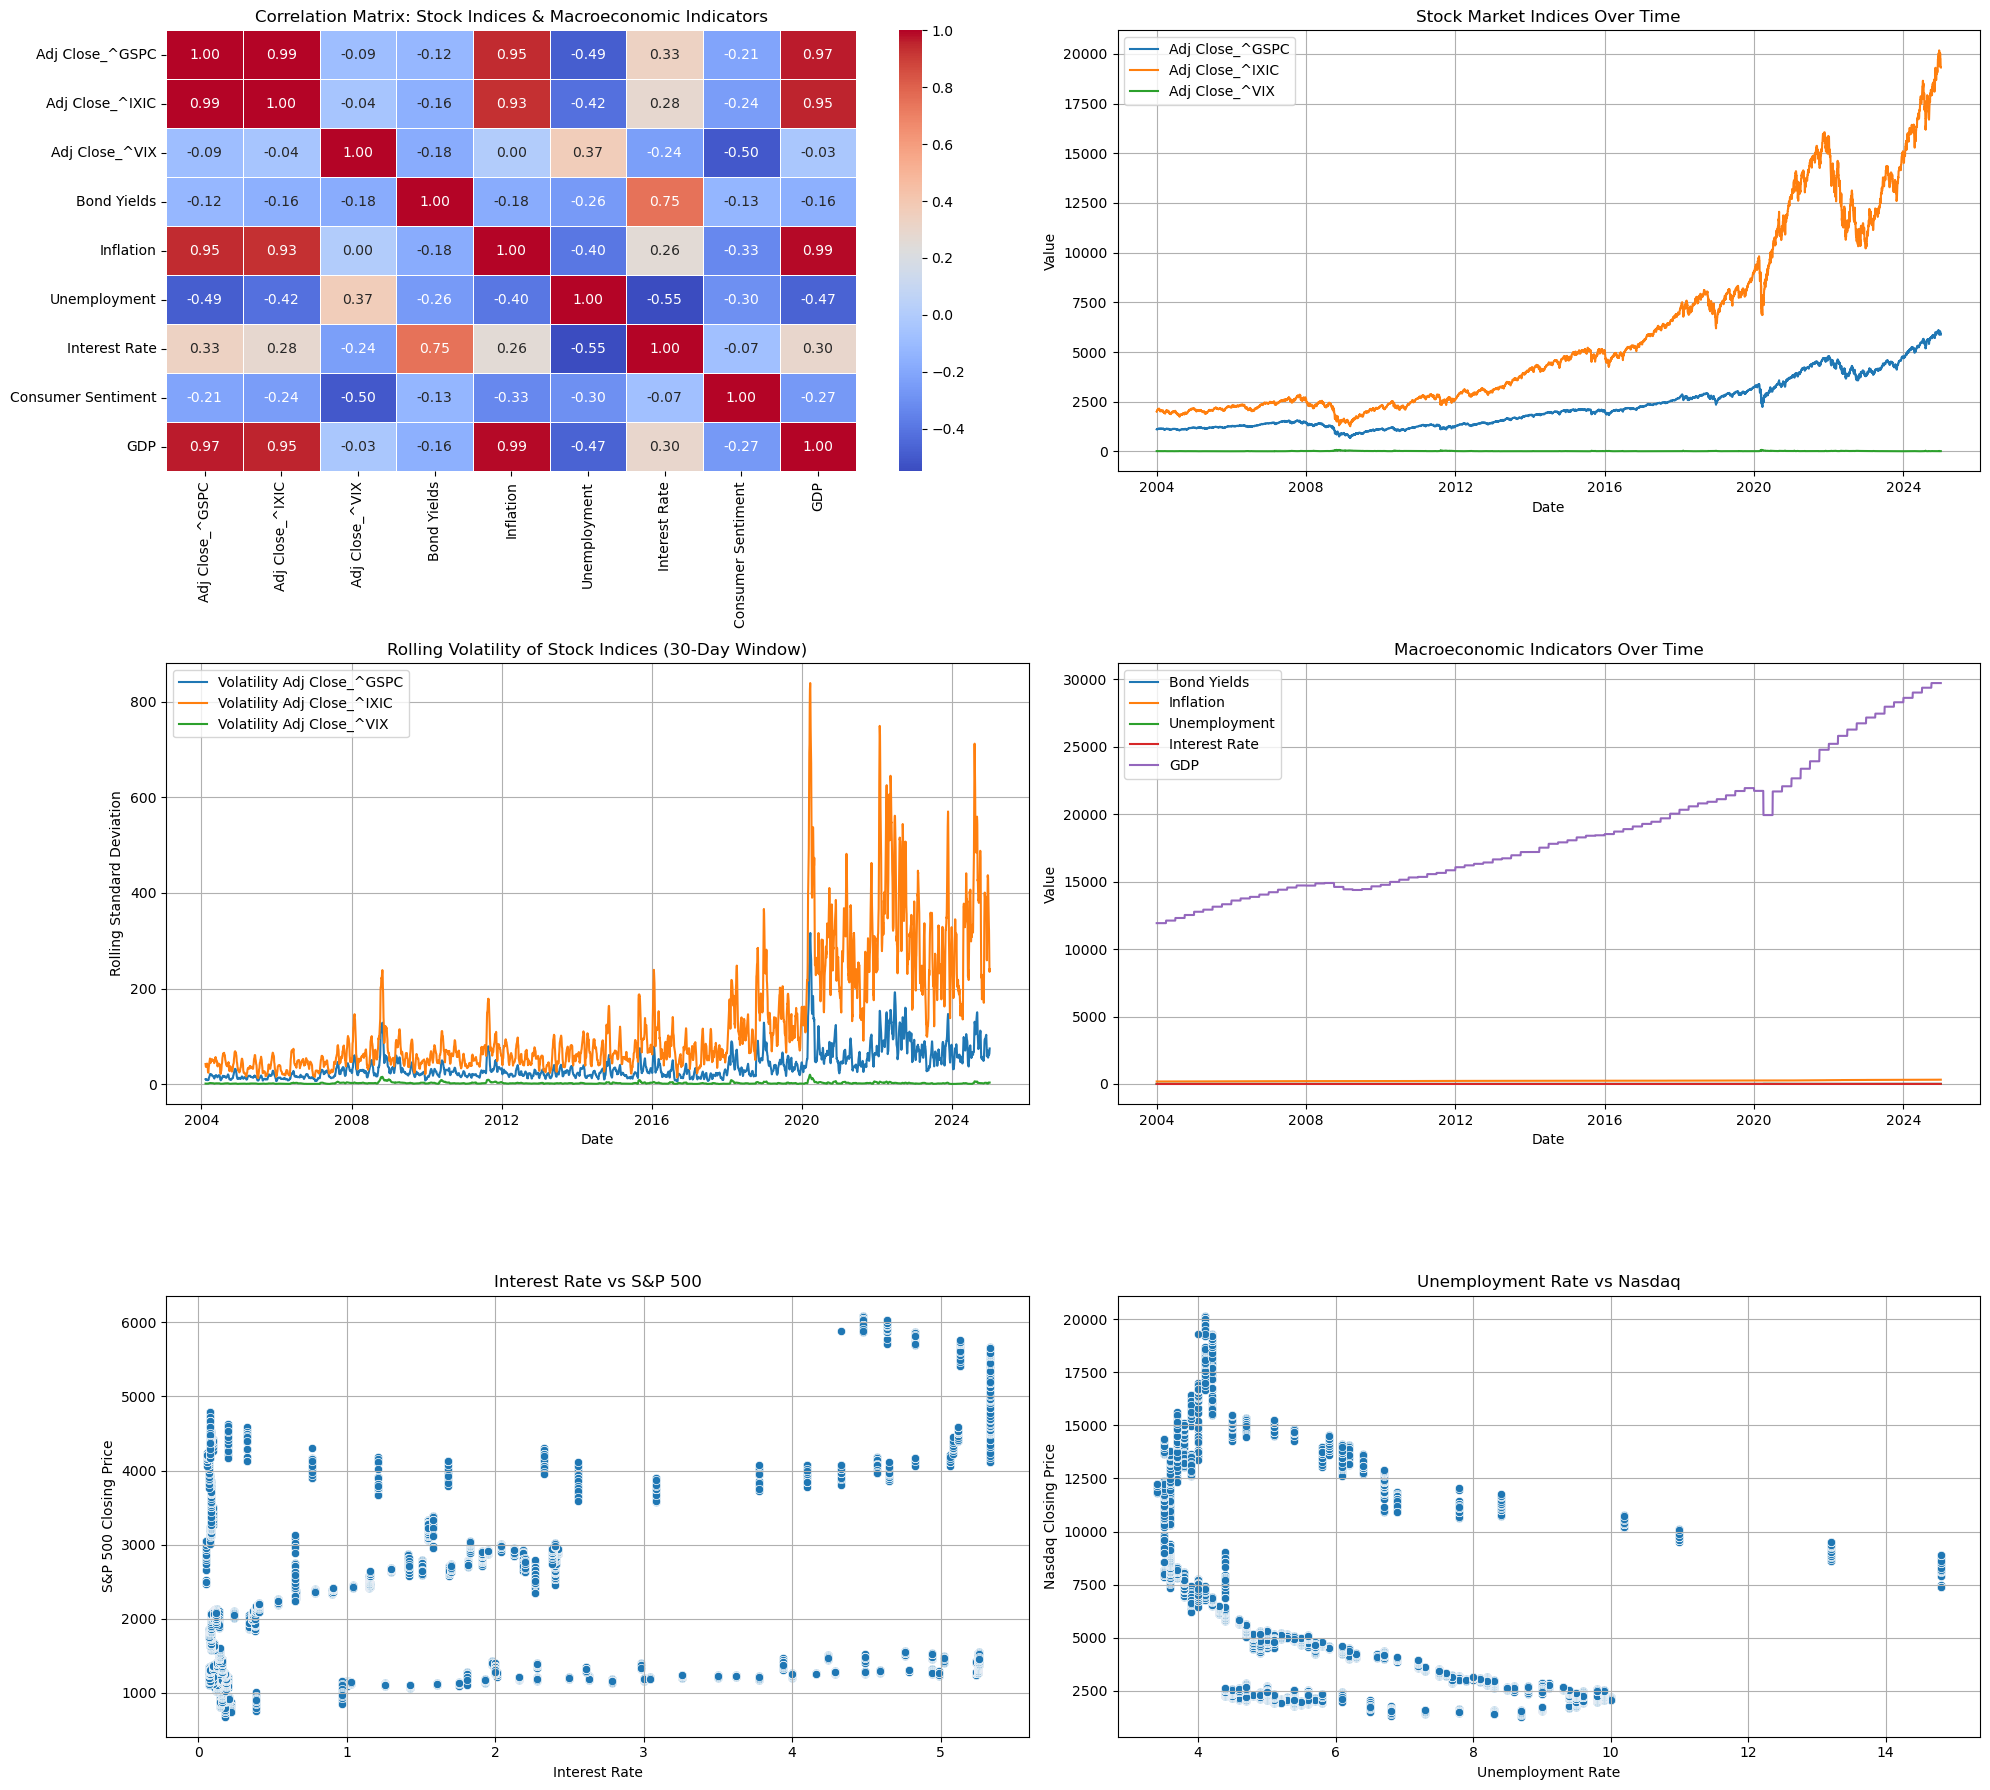

In [605]:
# Ensure necessary columns exist before proceeding
selected_columns = ['Adj Close_^GSPC', 'Adj Close_^IXIC', 'Adj Close_^VIX', 
                    'Bond Yields', 'Inflation', 'Unemployment', 'Interest Rate', 'Consumer Sentiment', 'GDP']

available_cols = [col for col in selected_columns if col in df_combined.columns]

# Create a figure with subplots to concatenate all visualizations
fig, axes = plt.subplots(3, 2, figsize=(20, 18))  # 3 rows, 2 columns

# --- 1️⃣ Correlation Matrix ---
df_corr = df_combined[available_cols].dropna()
corr_matrix = df_corr.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, ax=axes[0, 0])
axes[0, 0].set_title("Correlation Matrix: Stock Indices & Macroeconomic Indicators")

# --- 2️⃣ Time-Series Plot: Stock Indices Over Time ---
for col in ['Adj Close_^GSPC', 'Adj Close_^IXIC', 'Adj Close_^VIX']:
    if col in df_combined.columns:
        axes[0, 1].plot(df_combined['Date'], df_combined[col], label=col)
axes[0, 1].set_title("Stock Market Indices Over Time")
axes[0, 1].set_xlabel("Date")
axes[0, 1].set_ylabel("Value")
axes[0, 1].legend()
axes[0, 1].grid(True)

# --- 3️⃣ Rolling Volatility ---
rolling_window = 30
for col in ['Adj Close_^GSPC', 'Adj Close_^IXIC', 'Adj Close_^VIX']:
    if col in df_combined.columns:
        df_combined[f'Rolling_Volatility_{col}'] = df_combined[col].rolling(window=rolling_window).std()
        axes[1, 0].plot(df_combined['Date'], df_combined[f'Rolling_Volatility_{col}'], label=f'Volatility {col}')
axes[1, 0].set_title("Rolling Volatility of Stock Indices (30-Day Window)")
axes[1, 0].set_xlabel("Date")
axes[1, 0].set_ylabel("Rolling Standard Deviation")
axes[1, 0].legend()
axes[1, 0].grid(True)

# --- 4️⃣ Economic Indicator Trends ---
for col in ['Bond Yields', 'Inflation', 'Unemployment', 'Interest Rate', 'GDP']:
    if col in df_combined.columns:
        axes[1, 1].plot(df_combined['Date'], df_combined[col], label=col)
axes[1, 1].set_title("Macroeconomic Indicators Over Time")
axes[1, 1].set_xlabel("Date")
axes[1, 1].set_ylabel("Value")
axes[1, 1].legend()
axes[1, 1].grid(True)

# --- 5️⃣ Scatter Plot: Interest Rate vs S&P 500 ---
if 'Interest Rate' in df_combined.columns and 'Adj Close_^GSPC' in df_combined.columns:
    sns.scatterplot(x=df_combined['Interest Rate'], y=df_combined['Adj Close_^GSPC'], ax=axes[2, 0])
    axes[2, 0].set_title("Interest Rate vs S&P 500")
    axes[2, 0].set_xlabel("Interest Rate")
    axes[2, 0].set_ylabel("S&P 500 Closing Price")
    axes[2, 0].grid(True)

# --- 6️⃣ Scatter Plot: Unemployment vs Nasdaq ---
if 'Unemployment' in df_combined.columns and 'Adj Close_^IXIC' in df_combined.columns:
    sns.scatterplot(x=df_combined['Unemployment'], y=df_combined['Adj Close_^IXIC'], ax=axes[2, 1])
    axes[2, 1].set_title("Unemployment Rate vs Nasdaq")
    axes[2, 1].set_xlabel("Unemployment Rate")
    axes[2, 1].set_ylabel("Nasdaq Closing Price")
    axes[2, 1].grid(True)

# Adjust layout for clarity
plt.tight_layout()
plt.show()

**Observation:** Is volatility increasing over time?

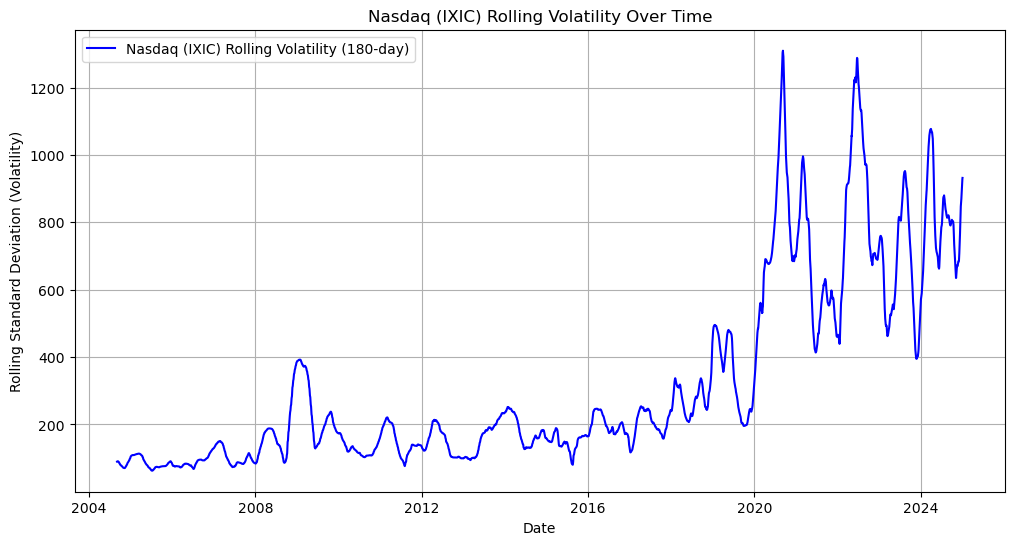

In [610]:
# Compute rolling standard deviation (volatility) for IXIC (Nasdaq)
rolling_window = 180  # Use a 180-day window to smooth out fluctuations

if 'Adj Close_^IXIC' in df_combined.columns:
    df_combined['Rolling_Volatility_IXIC'] = df_combined['Adj Close_^IXIC'].rolling(window=rolling_window).std()

# Plot rolling volatility for Nasdaq (IXIC)
plt.figure(figsize=(12, 6))

if 'Rolling_Volatility_IXIC' in df_combined.columns:
    plt.plot(df_combined['Date'], df_combined['Rolling_Volatility_IXIC'], label="Nasdaq (IXIC) Rolling Volatility (180-day)", color='blue')

plt.title("Nasdaq (IXIC) Rolling Volatility Over Time")
plt.xlabel("Date")
plt.ylabel("Rolling Standard Deviation (Volatility)")
plt.legend()
plt.grid(True)
plt.show()

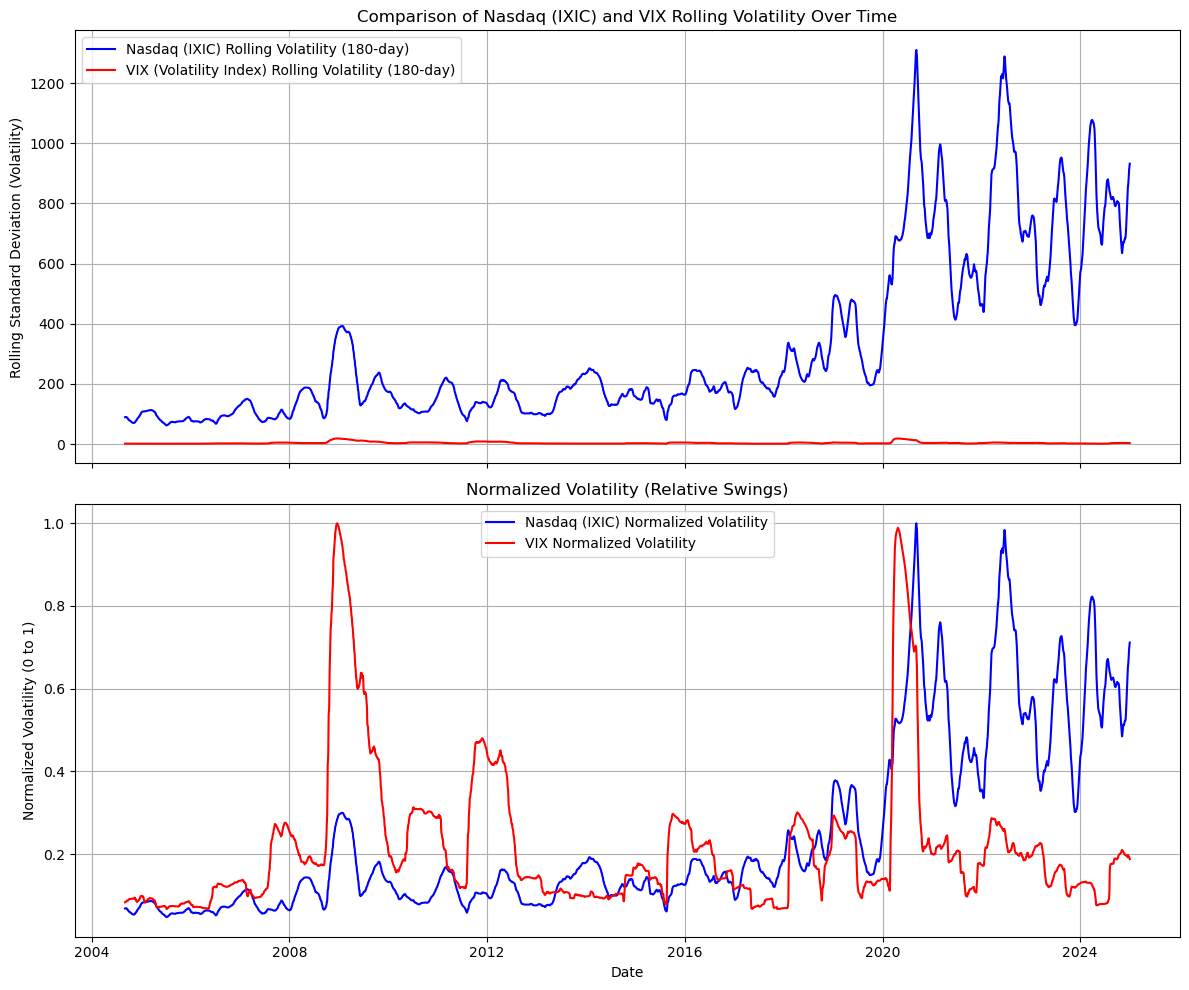

In [618]:
# Define a rolling window size
rolling_window = 180  # 180-day rolling volatility

# Compute rolling standard deviation (volatility) for Nasdaq (IXIC) and VIX
if 'Adj Close_^IXIC' in df_combined.columns and 'Adj Close_^VIX' in df_combined.columns:
    df_combined['Rolling_Volatility_IXIC'] = df_combined['Adj Close_^IXIC'].rolling(window=rolling_window).std()
    df_combined['Rolling_Volatility_VIX'] = df_combined['Adj Close_^VIX'].rolling(window=rolling_window).std()

# Normalize volatility to compare relative swings (percent change)
df_combined['Normalized_Volatility_IXIC'] = df_combined['Rolling_Volatility_IXIC'] / df_combined['Rolling_Volatility_IXIC'].max()
df_combined['Normalized_Volatility_VIX'] = df_combined['Rolling_Volatility_VIX'] / df_combined['Rolling_Volatility_VIX'].max()

# 📊 Create a single figure with subplots
fig, axes = plt.subplots(2, 1, figsize=(12, 10), sharex=True)

# --- 1️⃣ Overlayed Rolling Volatility Plot ---
axes[0].plot(df_combined['Date'], df_combined['Rolling_Volatility_IXIC'], label="Nasdaq (IXIC) Rolling Volatility (180-day)", color='blue')
axes[0].plot(df_combined['Date'], df_combined['Rolling_Volatility_VIX'], label="VIX (Volatility Index) Rolling Volatility (180-day)", color='red')
axes[0].set_title("Comparison of Nasdaq (IXIC) and VIX Rolling Volatility Over Time")
axes[0].set_ylabel("Rolling Standard Deviation (Volatility)")
axes[0].legend()
axes[0].grid(True)

# --- 2️⃣ Normalized Volatility Plot (Relative Swings) ---
axes[1].plot(df_combined['Date'], df_combined['Normalized_Volatility_IXIC'], label="Nasdaq (IXIC) Normalized Volatility", color='blue')
axes[1].plot(df_combined['Date'], df_combined['Normalized_Volatility_VIX'], label="VIX Normalized Volatility", color='red')
axes[1].set_title("Normalized Volatility (Relative Swings)")
axes[1].set_xlabel("Date")
axes[1].set_ylabel("Normalized Volatility (0 to 1)")
axes[1].legend()
axes[1].grid(True)

# Adjust layout for clarity
plt.tight_layout()
plt.show()

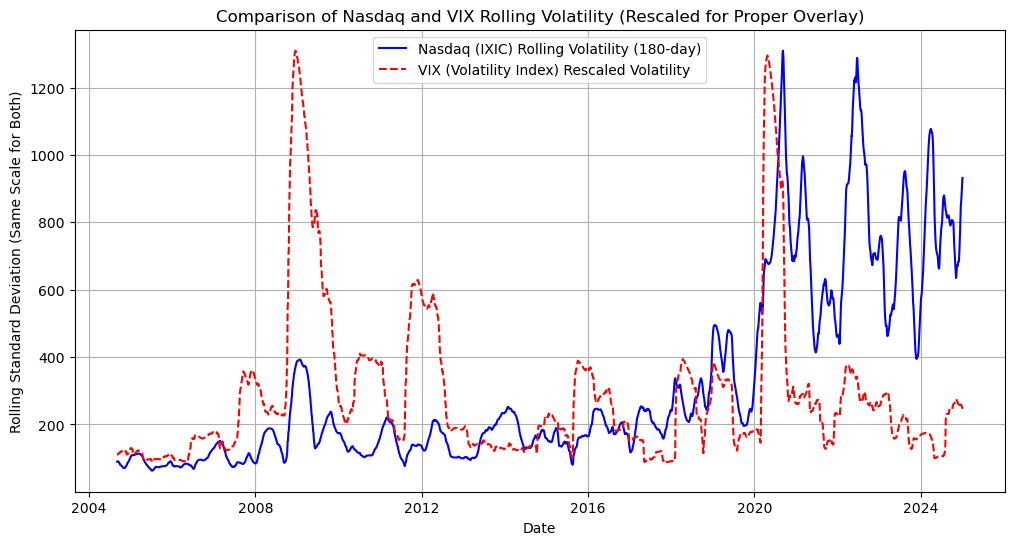

In [620]:
# Define a rolling window size
rolling_window = 180  # 180-day rolling volatility

# Compute rolling standard deviation (volatility) for Nasdaq (IXIC) and VIX
if 'Adj Close_^IXIC' in df_combined.columns and 'Adj Close_^VIX' in df_combined.columns:
    df_combined['Rolling_Volatility_IXIC'] = df_combined['Adj Close_^IXIC'].rolling(window=rolling_window).std()
    df_combined['Rolling_Volatility_VIX'] = df_combined['Adj Close_^VIX'].rolling(window=rolling_window).std()

# Normalize only VIX, then rescale to match Nasdaq's volatility scale
max_ixic_volatility = df_combined['Rolling_Volatility_IXIC'].max()
df_combined['Rescaled_Volatility_VIX'] = (df_combined['Rolling_Volatility_VIX'] / df_combined['Rolling_Volatility_VIX'].max()) * max_ixic_volatility

# 📊 Create a single figure for overlaying both
plt.figure(figsize=(12, 6))

# --- 1️⃣ Overlayed Rolling Volatility Plot (Properly Scaled) ---
plt.plot(df_combined['Date'], df_combined['Rolling_Volatility_IXIC'], label="Nasdaq (IXIC) Rolling Volatility (180-day)", color='blue')
plt.plot(df_combined['Date'], df_combined['Rescaled_Volatility_VIX'], label="VIX (Volatility Index) Rescaled Volatility", color='red', linestyle='dashed')

plt.title("Comparison of Nasdaq and VIX Rolling Volatility (Rescaled for Proper Overlay)")
plt.xlabel("Date")
plt.ylabel("Rolling Standard Deviation (Same Scale for Both)")
plt.legend()
plt.grid(True)

# Show plot
plt.show()

**Questions:**

![Alternative Text](share/IMG_6945.jpg)

#### **2nd Dataset: `dfs["motilal_oswal"]`**

In [169]:
# uncomment to view
# print(dfs["motilal_oswal"].head())
# print(dfs["motilal_oswal"].columns)

In [626]:
motilal_oswal = dfs["motilal_oswal"].copy()

In [628]:
motilal_oswal.head()

,Scheme Code,Scheme Name,ISIN Div Payout/ISIN Growth,ISIN Div Reinvestment,Net Asset Value,Repurchase Price,Sale Price,Date
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Open Ended Schemes ( Equity Scheme - Multi Cap...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Motilal Oswal Mutual Fund,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [632]:
import pandas as pd
import requests
from io import StringIO

# Fetch AMFI Mutual Fund NAV Data
amfi_url = "https://www.amfiindia.com/spages/NAVAll.txt"
headers = {'User-Agent': 'Mozilla/5.0'}

# Get the raw text response
response = requests.get(amfi_url, headers=headers)
data = response.text

# Convert text into a list of lines
lines = data.split("\n")

# Identify where the actual data starts (ignoring headers like "Open Ended Schemes")
start_index = next(i for i, line in enumerate(lines) if line.startswith("Scheme Code"))

# Extract only the tabular data
data_cleaned = "\n".join(lines[start_index:])

# Read into Pandas DataFrame
df_mutual_funds = pd.read_csv(StringIO(data_cleaned), delimiter=";", encoding="latin1")

# Clean column names (remove spaces)
df_mutual_funds.columns = df_mutual_funds.columns.str.strip()

# Convert Date column to datetime
df_mutual_funds['Date'] = pd.to_datetime(df_mutual_funds['Date'], errors='coerce')

# Keep relevant columns
df_mutual_funds = df_mutual_funds[['Date', 'Scheme Name', 'Net Asset Value']]

# Remove rows with missing data
df_mutual_funds = df_mutual_funds.dropna()

# Sort by date
df_mutual_funds = df_mutual_funds.sort_values(by='Date')

# Save cleaned data as CSV
df_mutual_funds.to_csv("india_mutual_funds_cleaned.csv", index=False)

# Display first few rows
print(df_mutual_funds.head())

           Date                                        Scheme Name  \
1319 2008-10-02   BANDHAN LIQUID FUND - Inst Plan B - Periodic Div   
2225 2012-02-17  ICICI Prudential Medium Term Bond Fund Plan A ...   
1438 2012-05-14  HDFC Liquid Fund-Premium Plus Plan - Dividend-...   
6182 2012-08-10  SBI ONE INDIA FUND - GROWTH (PREVIOUSLY CLOSE ...   
6181 2012-08-10  SBI ONE INDIA FUND - DIVIDEND (PREVIOUSLY CLOS...   

     Net Asset Value  
1319               0  
2225         10.0458  
1438              10  
6182           10.43  
6181           10.43  


#### **3rd Dataset: `dfs["wsb_stocks"]`**

In [ ]:
# uncomment to view
# print(dfs["wsb_stocks"].head())
# print(dfs["wsb_stocks"].columns)

#### **4th Dataset: `dfs["startup_data"]`**

In [ ]:
# uncomment to view
# print(dfs["startup_data"].head())
# print(dfs["startup_data"].columns)